# 感染病の数理モデル


感染症の流行を評価するための数理モデルで、微分方程式で表現する。
例えば、事前に感染症の被害予測をすることによって、ワクチン配布の優先順位付けに役立てることができる。

感染症の数理モデルは、
  
- SIR model
- SEIR model
- MAS model

などがある。

## 感染症の理論が進展した理由
感染症は特異な点が多く学問対象として発展した。
1. 古くから伝染病が主要死因であった
2. 宿主から宿主へと伝播する特異な疾病であること
3. 癌とは違って、感染者自体が危険因子となる
4. 1度感染するか、予防接種による抗原刺激を受けるだけで一定期間の免疫を得る
5. 感染者は感染症例と認識されないまま、感染源となる場合がある

## SIRモデル
最も基本的なモデルは、**SIRモデル(Susceptible-Infectious-Recovered)** で、ある集団（人口Nなど）を次の集団に区分して、その時間発展を微分方程式で表現する。Susceptible（無免疫者：免疫がなく感染する可能性のある人、現在は健康な人）、Infected（発症者：感染症にかかっている人）、Recoverd/Removed（回復者：回復して免疫を獲得した人 or 死亡者）に分けるて検討する。それぞれの分け方を区画（Compartment）と呼ぶ。各区画間の時間あたりの変化は、常微分方程式によって、以下のように表す。

$$
\frac {dS(t)} {dt} =-\beta S(t)I(t)
$$

$$
\frac {dI(t)} {dt} =\beta S(t)I(t) - \gamma I(t)
$$


$$
\frac {dR(t)} {dt} = \gamma I(t)
$$

$\beta$は、感染率、$\gamma$は回復率である。$ \beta S(t)$は感染力（force of infection）といい、単位時間あたり単位人口当たりの感受性人口感染率を表す。人口を$N$とすると、$N = S + I + R$となる。つまり、全ての人は、健康であるか、感染しているか、回復したかのいずれかに区画されたモデルである。短期的な流行を考慮したモデルのため、出生・死亡などの人口動態はほぼ無視できると想定しているので、$ \frac{N(t)}{dt} = 0$ となる。

なお、感染しても感染性の無い状態（latent period / exposed class）や感染してるが発症しない潜伏期間（incubation period）を考慮する場合は、**SEIRモデル** がある。また、免疫性が無限に続かない場合は、$R → S$という状態変化が可能となり、**SIRS**がある。

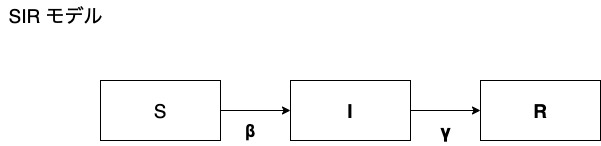


#### 1行目の式
$ \frac {dS(t)} {dt} $は、$S$（無免疫者）が徐々に減っていく様子を表している。人と人との交流は、
$S*S,S*I,S*R,I*I,I*R,R*R$の6パターンがあり、そのうち$S*I$のパターンに限り感染が拡大する。つまり、$S$と$I$の両方とも多いと感染症は速いスピードで拡大し、どちらかが少ないとゆっくり広がるといえる。


#### 2行目の式
$ \frac {dI(t)} {dt} $は、感染者の純増数を表す。$\beta S(t)I(t)$で感染者数の増加、$- \gamma I(t)$は回復率に応じて回復した人を差し引いている。

#### 3行目の式
$ \frac {dR(t)} {dt} = \gamma I(t) $は、$\gamma I(t)$で回復した人の数、回復者が徐々に増えていく様子を表している。



$\frac {1}{\gamma}$は、感染率の逆数で、感染者の感染状態にある平均滞在時間である。


### SIR model with Python

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import rcParams

#Matplotlib for Japanese and Jupyter notebook inline 
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Noto Sans CJK JP','Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', ]
%matplotlib inline





In [3]:
# 人口N
N = 1000

# 初期感染者I0と、初期回復者R0
I0, R0 = 1, 0

# 初期健康な人S0
S0 = N - I0 - R0

# 感染率beta, 回復率gamma
beta, gamma, = 0.2, 1./14

t = np.linspace(0,160,160)

# SIRモデルの方程式

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta *  S * I / N
    dIdt = beta *  S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# 初期条件ベクトル
y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T



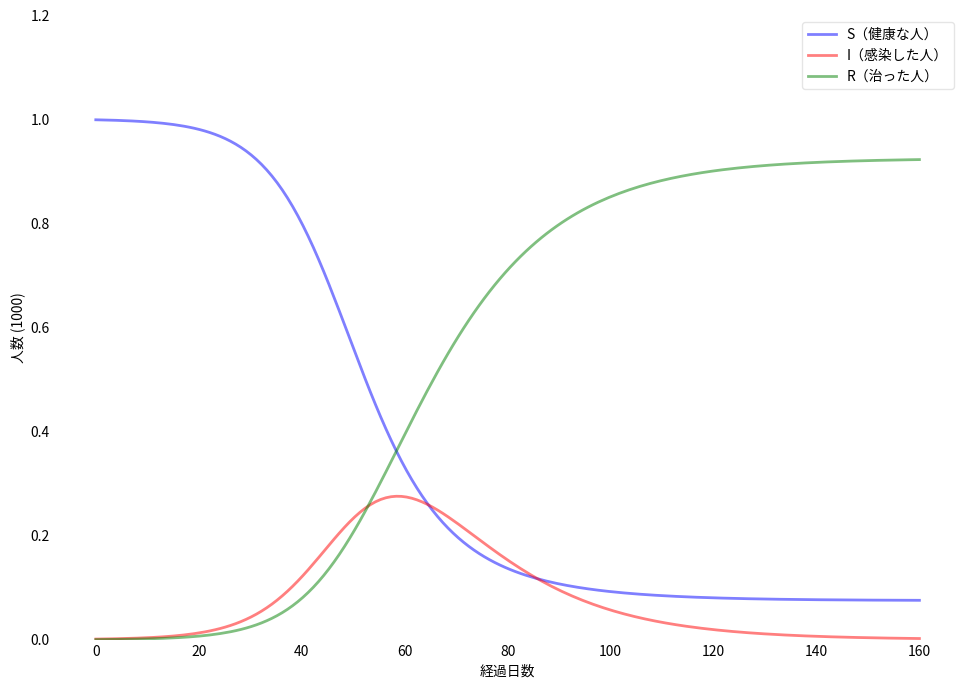

In [4]:
fig = plt.figure(facecolor='w',figsize=(11.69,8.27),dpi=100,)
ax = fig.add_subplot(111,axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='S（健康な人）')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='I（感染した人）')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='R（治った人）')
ax.set_xlabel('経過日数')
ax.set_ylabel('人数 (1000)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()





## SEIR モデル

SIRモデルに、潜伏期間を追加したモデル。

Susceptible（無免疫者：免疫がなく感染する可能性のある人、現在は健康な人）、Exposed（潜伏状態感染者：感染したが、他者に対する感染性は持っていない状態の人）、Infected（発症者：感染症にかかっている人）、Recoverd/Removed（回復者：回復して免疫を獲得した人 or 死亡者）

$$
\frac {dS(t)} {dt} =-\beta S(t)I(t)
$$

$$
\frac {dE(t)} {dt} =\beta S(t)I(t) - \alpha E(t)
$$


$$
\frac {dI(t)} {dt} =\alpha E(t) - \gamma I(t)
$$


$$
\frac {dR(t)} {dt} = \gamma I(t)
$$


$\alpha$は発症率、$\beta$は感染率、$\gamma$は回復率である。

### SEIR model with Python

In [5]:
# 人口N
N = 1000

# 初期潜伏期間者E0と、初期感染者I0と、初期回復者R0
E0, I0, R0 = 0, 1, 0

# 初期健康な人S0
S0 = N - E0 - I0 - R0

# 発症率alpha, 感染率beta, 回復率gamma
alpha, beta, gamma, = 0.2, 0.2, 1./14

t = np.linspace(0,160,160)

# SEIRモデルの方程式

def deriv(y, t, N, alpha, beta, gamma):
    S, E, I, R = y
    dSdt = -beta *  S * I / N
    dEdt = beta * S * I / N - alpha * E
    dIdt = alpha * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# 初期条件ベクトル
y0 = S0, E0, I0, R0

ret = odeint(deriv, y0, t, args=(N, alpha, beta, gamma))
S, E, I, R = ret.T



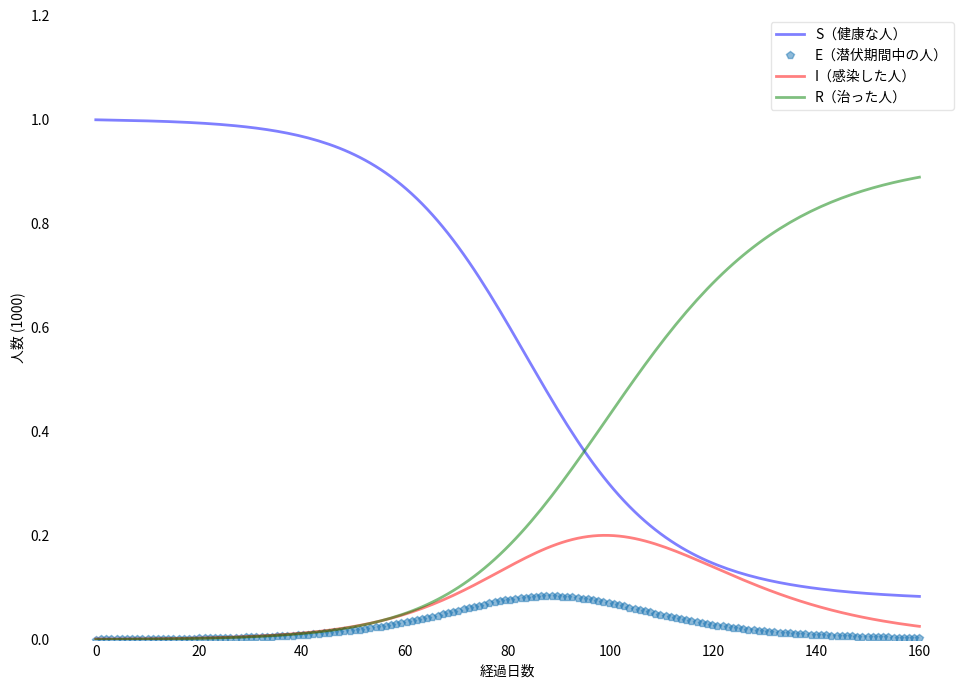

In [6]:
fig = plt.figure(facecolor='w',figsize=(11.69,8.27),dpi=100,)
ax = fig.add_subplot(111,axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='S（健康な人）')
ax.plot(t, E/1000, 'p', alpha=0.5, lw=2, label='E（潜伏期間中の人）')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='I（感染した人）')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='R（治った人）')
ax.set_xlabel('経過日数')
ax.set_ylabel('人数 (1000)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


#### 参考資料



感染症流行の予測:感染症数理モデルにおける定量的課題  
https://www.ism.ac.jp/editsec/toukei/pdf/54-2-461.pdf

数学的モデルとしての微分方程式を生み出す授業  
http://www.u-gakugei.ac.jp/~mathed/5secondary/20140621kobayashi.pdf

伝染病流行の数理モデル1  
https://www.ms.u-tokyo.ac.jp/~inaba/inaba2000_kaiyouken.pdf

微分方程式と感染症数理疫学  
https://www.ms.u-tokyo.ac.jp/~inaba/inaba_science_2008.pdf

感染症流行モデル  
http://dr-urashima.jp/pdf/kaneki-2.pdf

サイエンティスト・トーク「数理モデリングで感染症の広がりを防げ！ 数理モデル大実験」  
https://youtu.be/0GhTQtcbgsA
